In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

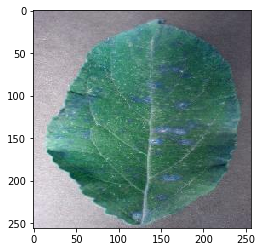

In [2]:
img = cv2.imread('./image.jpg')
plt.imshow(img)
plt.show()

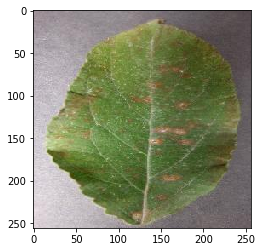

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

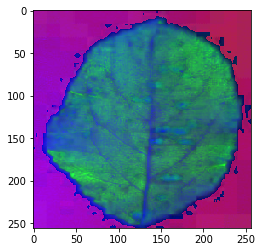

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

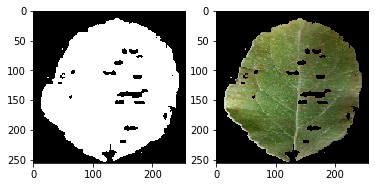

In [5]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

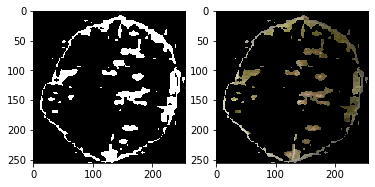

In [6]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

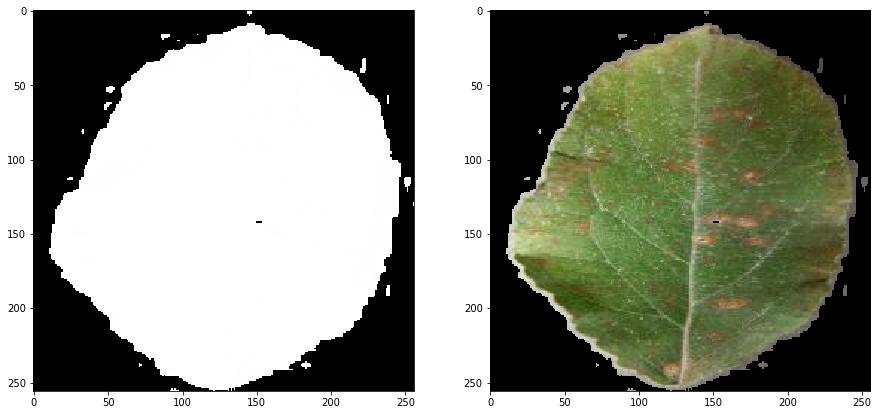

In [7]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [9]:
sift = cv2.SIFT_create(400)
# Find keypoints and descriptors directly
kp, des = sift.detectAndCompute(final_result,None)
len(kp)

263

In [10]:
print(kp)

(<KeyPoint 0000015EF4DF24B0>, <KeyPoint 0000015EF4F7EF00>, <KeyPoint 0000015EF4F7EB40>, <KeyPoint 0000015EF4F7EF90>, <KeyPoint 0000015EF4F7E930>, <KeyPoint 0000015EF4F7EBD0>, <KeyPoint 0000015EF4FB44E0>, <KeyPoint 0000015EF4FB4B70>, <KeyPoint 0000015EF4FB4D20>, <KeyPoint 0000015EF4FB4E10>, <KeyPoint 0000015EF4FB4C60>, <KeyPoint 0000015EF4FB43C0>, <KeyPoint 0000015EF4FB45A0>, <KeyPoint 0000015EF4FB48D0>, <KeyPoint 0000015EF4FB46C0>, <KeyPoint 0000015EF4FB45D0>, <KeyPoint 0000015EF4FB4660>, <KeyPoint 0000015EF4FB4ED0>, <KeyPoint 0000015EF4FB4630>, <KeyPoint 0000015EF4FB4BD0>, <KeyPoint 0000015EF4FB4930>, <KeyPoint 0000015EF4FB4900>, <KeyPoint 0000015EF4FB4870>, <KeyPoint 0000015EF4FB4A50>, <KeyPoint 0000015EF4FB4990>, <KeyPoint 0000015EF4FB4BA0>, <KeyPoint 0000015EF4FB4A20>, <KeyPoint 0000015EF4FB4450>, <KeyPoint 0000015EF4FB47B0>, <KeyPoint 0000015EF4FB4210>, <KeyPoint 0000015EF4FB4690>, <KeyPoint 0000015EF4FB4C30>, <KeyPoint 0000015EF4FB43F0>, <KeyPoint 0000015EF4FB4720>, <KeyPoint 000

In [11]:
print(des)

[[14.  0.  0. ... 82.  0.  0.]
 [ 6.  0.  0. ...  4.  0.  0.]
 [31. 15.  0. ... 22.  5.  2.]
 ...
 [ 1.  0.  0. ...  0.  3.  3.]
 [40.  0.  2. ...  2.  0.  1.]
 [ 8.  5.  0. ...  0.  6. 15.]]


In [12]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

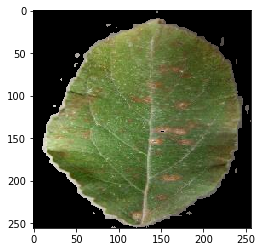

In [13]:
plt.imshow(final_result)

In [14]:
# global Feature
global_feature = des

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [16]:
global_feature.shape

(263, 128)

In [18]:
sift.descriptorSize()

128

In [19]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))

[STATUS] feature vector size (263, 128)


In [20]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")